## Initialising Notebook

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', 26)


In [5]:
%matplotlib inline

In [7]:
plt.style.use('dark_background')

## Loading Data

In [9]:
df = pd.read_csv('kidney_disease.csv')

In [11]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [13]:
df.shape

(400, 26)

## Data Wrangling

**dropping** id column

In [17]:
df.drop('id' , axis = 1, inplace = True)

**renaming columns** for easy usage

In [22]:
df.columns = ['age', 'bp', 'specific_gravity', 'albumin', 'sugar', 'rbc', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'anemia', 'class']

In [24]:
df.describe()

,age,bp,specific_gravity,albumin,sugar,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   bp                       388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   rbc                      248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

**Changing Object Types to Numerical Types** in packed_cell_volume, red_blood_cell_count and white_blood_cell_count

In [30]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   bp                       388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   rbc                      248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

**Separating categorical and numerical columns**

In [35]:
categorical_cols = [col for col in df.columns if df[col].dtype == 'object']
numerical_cols = [col for col in df.columns if df[col].dtype != 'object']

**Unique values in categorical columns**

In [38]:
for col in categorical_cols:
    print (f"{col} has {df[col].unique()} \n")

rbc has [nan 'normal' 'abnormal'] 

pus_cell has ['normal' 'abnormal' nan] 

pus_cell_clumps has ['notpresent' 'present' nan] 

bacteria has ['notpresent' 'present' nan] 

hypertension has ['yes' 'no' nan] 

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] 

coronary_artery_disease has ['no' 'yes' '\tno' nan] 

appetite has ['good' 'poor' nan] 

peda_edema has ['no' 'yes' nan] 

anemia has ['no' 'yes' nan] 

class has ['ckd' 'ckd\t' 'notckd'] 



We can see that in diabetes_mellitus there are **multiple ambiguous columns** like ' yes', '\tno' , etc

In [48]:
df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)
df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')
df['class'] = df['class'].replace(to_replace = {'ckd\t': 'ckd', 'notckd': 'not ckd'})

**Converting class to 0 and 1**

In [51]:
df['class'] = df['class'].map({'ckd': 0, 'not ckd': 1})
df['class'] = pd.to_numeric(df['class'], errors='coerce')

**Distribution of Numerical Features**

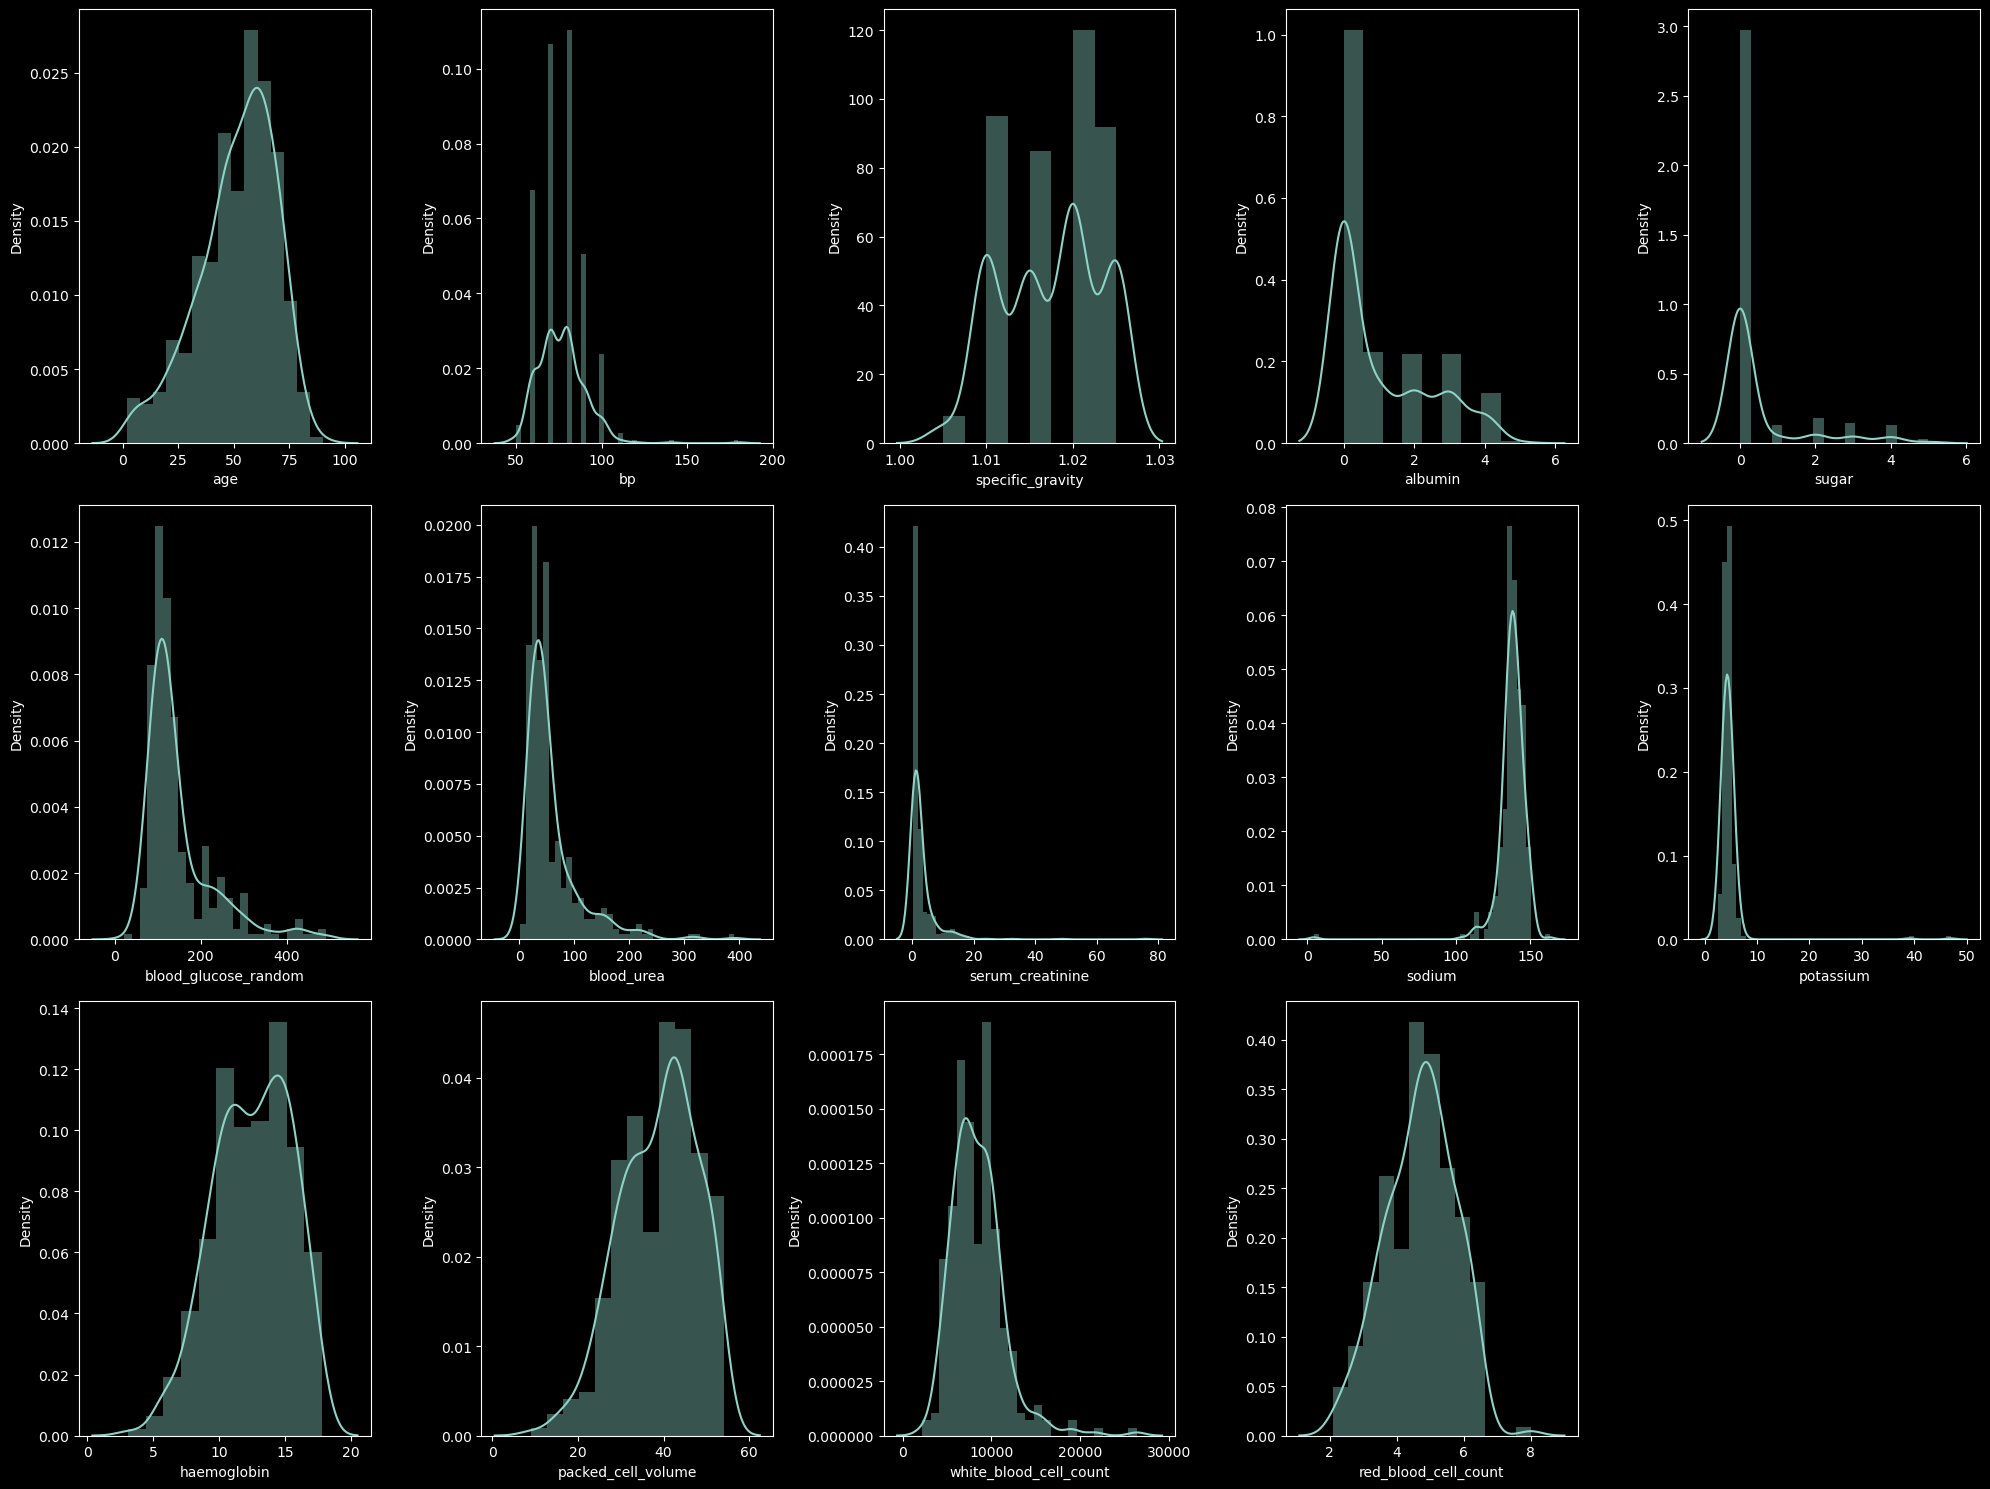

In [54]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in numerical_cols:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

We see that some **columns exhibit Skewness**

**Looking at Categorical Data**

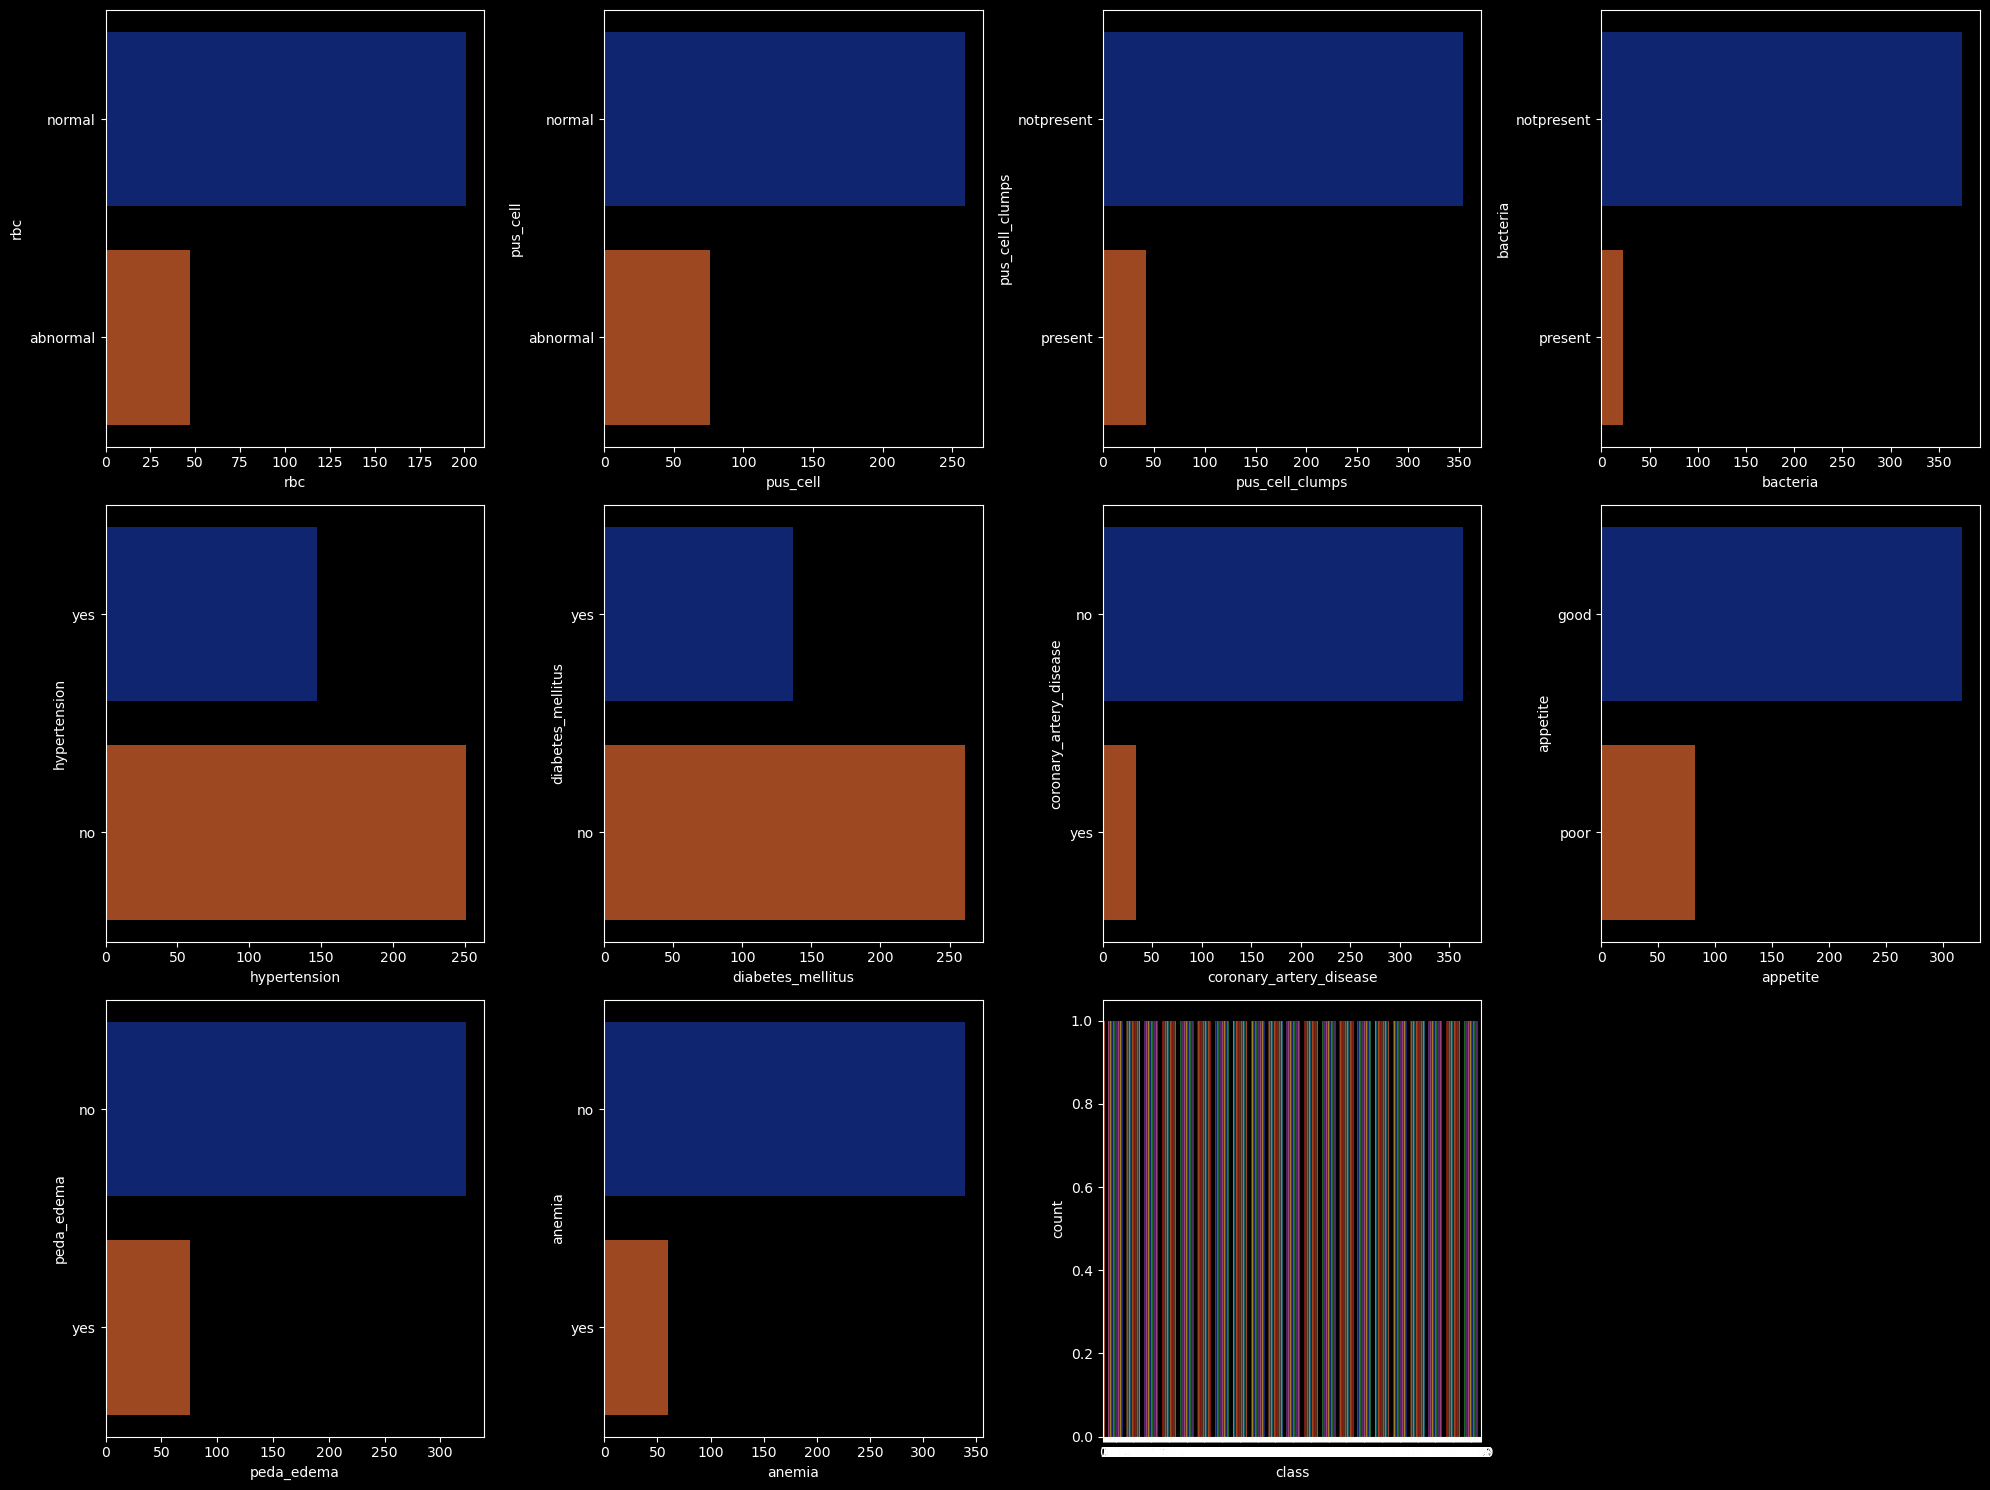

In [103]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in categorical_cols:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(df[column], palette = 'dark')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

**Heatmap**

In [106]:
numerical_cols.append(df['class'])

In [108]:
numeric_df = df.select_dtypes(include=['number'])

In [110]:
numeric_df.dtypes

age                       float64
bp                        float64
specific_gravity          float64
albumin                   float64
sugar                     float64
blood_glucose_random      float64
blood_urea                float64
serum_creatinine          float64
sodium                    float64
potassium                 float64
haemoglobin               float64
packed_cell_volume        float64
white_blood_cell_count    float64
red_blood_cell_count      float64
class                       int64
dtype: object

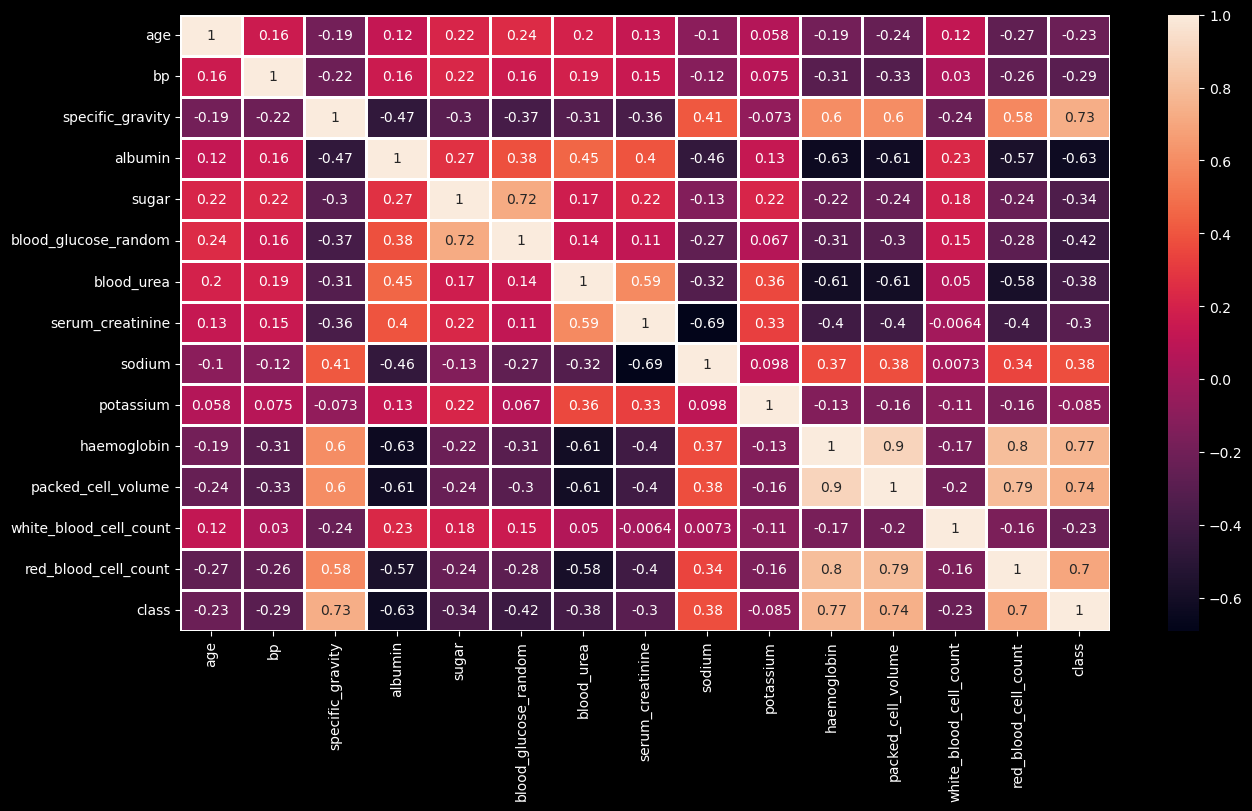

In [112]:
plt.figure(figsize = (15, 8))

sns.heatmap(numeric_df.corr(), annot = True, linewidths = 2)
plt.show()

## Exploratory Data Analysis (EDA)

**Defining functions**

In [152]:
def violin(col):
    fig = px.violin(df, y=col, x="class", color="class", box=True, points = 'all', template = 'plotly_dark')
    return fig.show()

In [154]:
def kde(col):
    grid = sns.FacetGrid(df, hue="class", height = 6, aspect=2)
    grid.map(sns.kdeplot, col)
    grid.add_legend()

In [284]:
def bar(col1, col2):
    fig = px.bar(df, x=col1, y=col2, color='class', barmode='group', template = 'plotly_dark', height = 400)
    return fig.show()

In [255]:
import plotly.graph_objects as go

def scatter(col1, col2):
    fig = px.scatter(df, x=col1, y=col2, template='plotly_dark')
    custom_colors = ['red' if x == 0 else 'green' for x in df['class']]
    fig.update_traces(marker=dict(color=custom_colors))

    # Create custom legend items using graph_objects
    custom_legend = [
        go.Scatter(
            x=[None],
            y=[None],
            mode='markers',
            marker=dict(size=10, color='red'),
            legendgroup='0',
            showlegend=True,
            name='0'
        ),
        go.Scatter(
            x=[None],
            y=[None],
            mode='markers',
            marker=dict(size=10, color='green'),
            legendgroup='1',
            showlegend=True,
            name='1'
        )
    ]

    # Add custom legend traces to the figure
    for trace in custom_legend:
        fig.add_trace(trace)

    # Update layout to add a custom title and position the legend
    fig.update_layout(
        legend=dict(
            title="Class",
            itemsizing='constant',
        )
    )

    return fig.show()


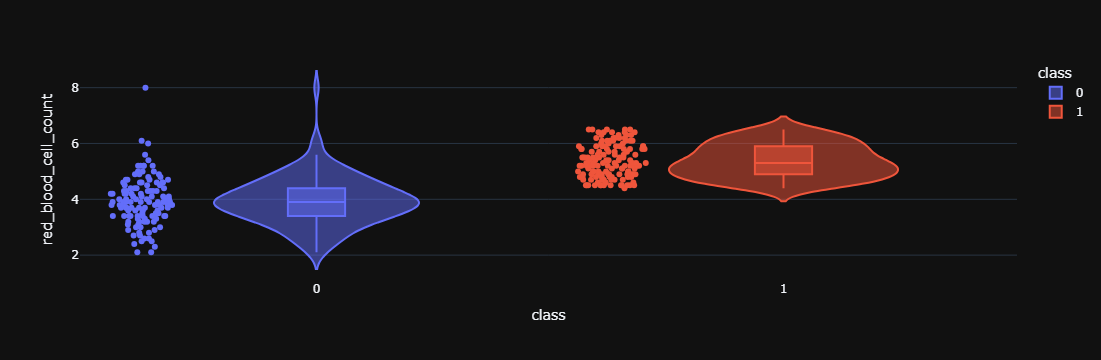

In [158]:
violin ('red_blood_cell_count')

**Class 0** shows a **wider distribution and higher variance** in red blood cell count compared to **Class 1**, which has a **more compact and lower range**.

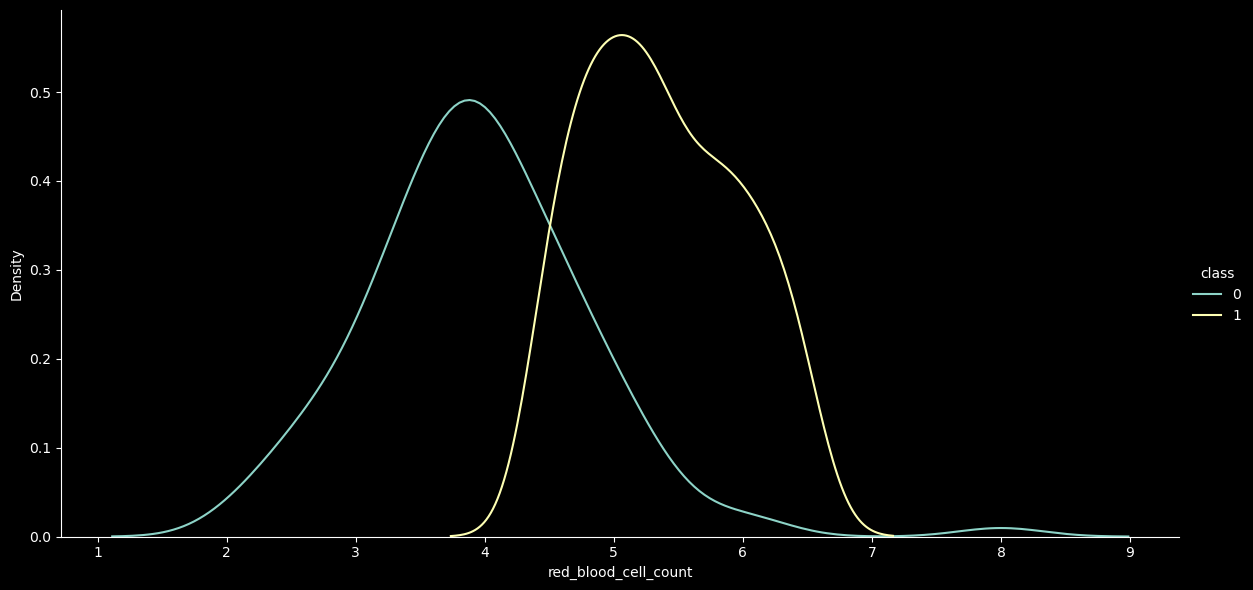

In [161]:
kde('red_blood_cell_count')

**Class 0** generally has **lower** red blood cell counts with a **peak around 4**, whereas **Class 1** has **higher** counts with a **peak around 5.5**.

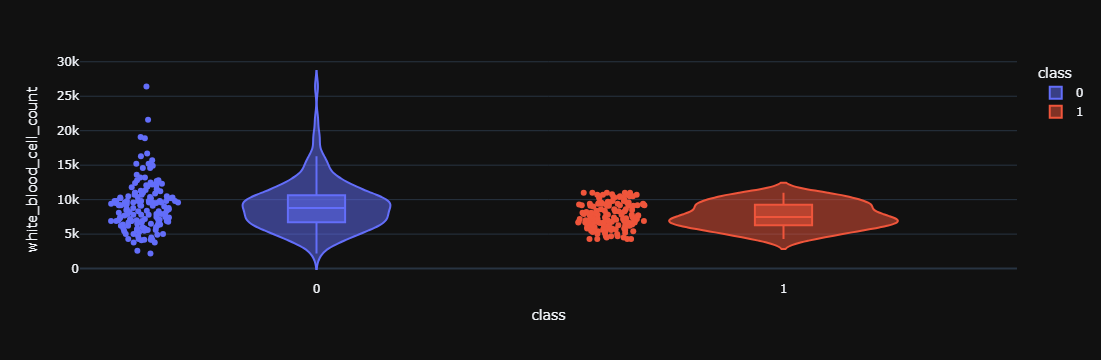

In [167]:
violin ('white_blood_cell_count')

**Class 0** exhibits a **broader and more varied distribution** of white blood cell count compared to the **more compact distribution in Class 1.**

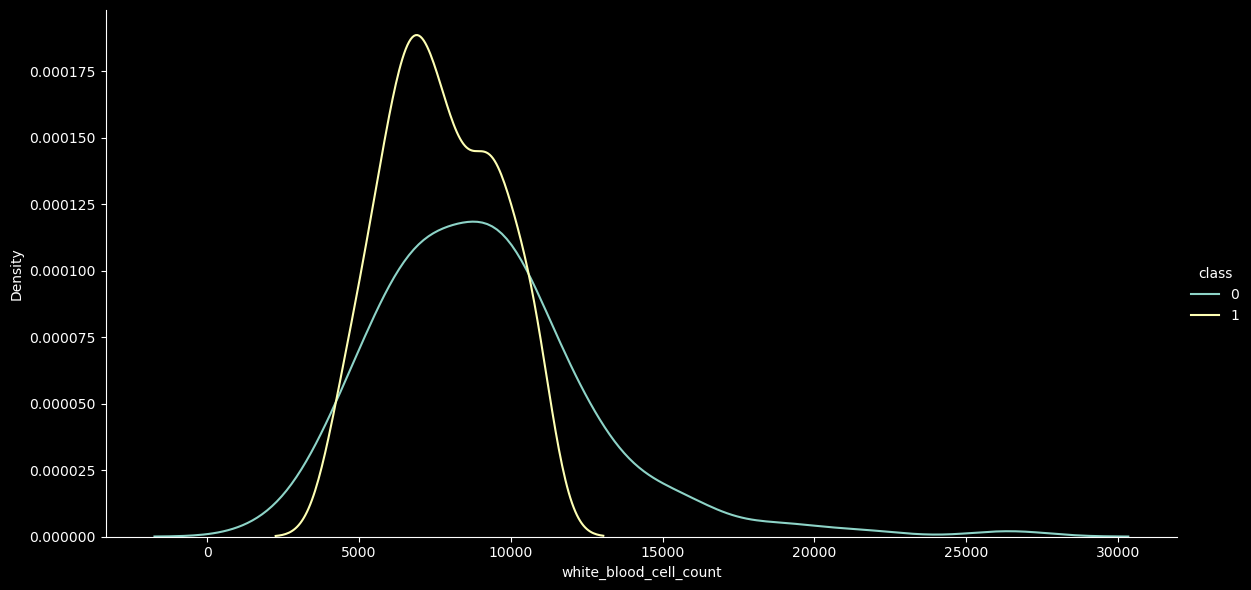

In [169]:
kde('white_blood_cell_count')

**Class 0** has a **higher density peak around 8000**, while **Class 1** shows a **higher density peak around 10000.**

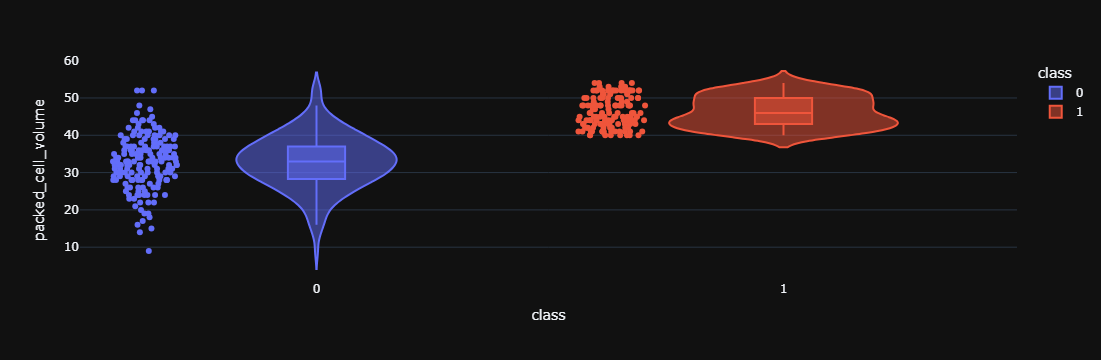

In [173]:
violin ('packed_cell_volume')

**Class 0** shows a **wider distribution** with **higher variance** in packed cell volume compared to **Class 1**, which is **more concentrated around the mean**.

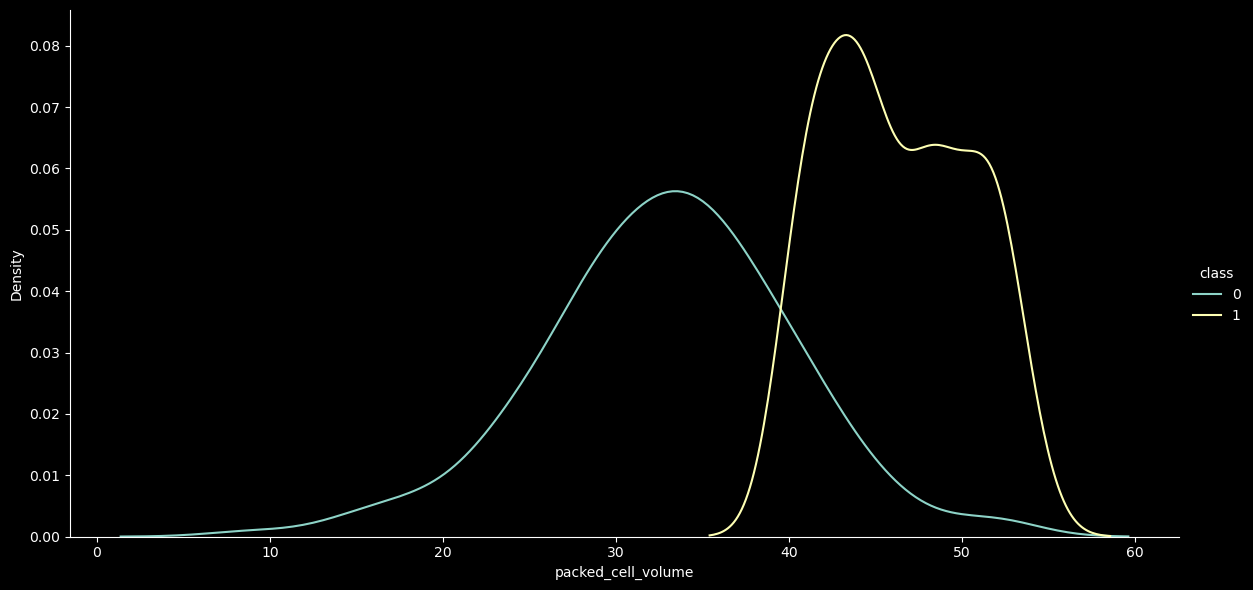

In [176]:
kde('packed_cell_volume')

The packed cell volume distribution for **class 1 is generally higher** than that for class 0.

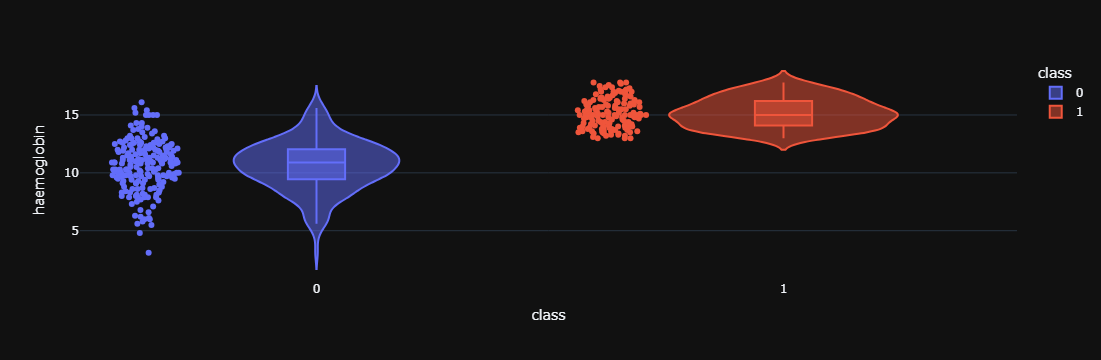

In [179]:
violin ('haemoglobin')

**Hemoglobin levels are higher on average in class 1** compared to class 0, with **class 1 showing less variance**.

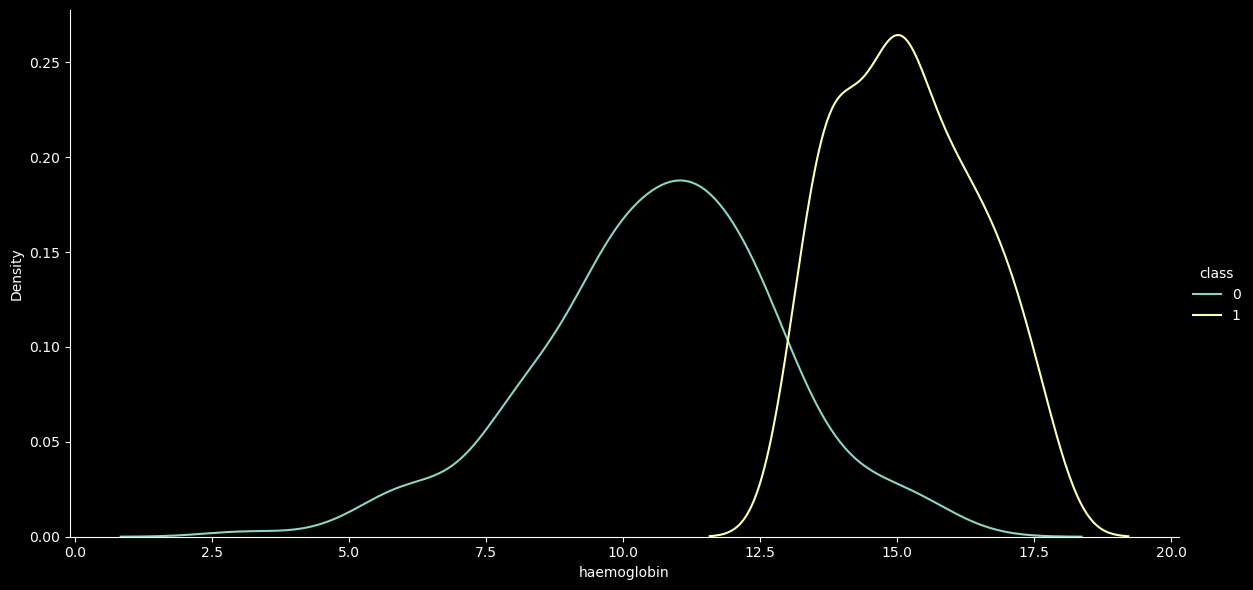

In [182]:
kde('haemoglobin')

Hemoglobin levels in **class 1 are higher and more concentrated** compared to class 0.

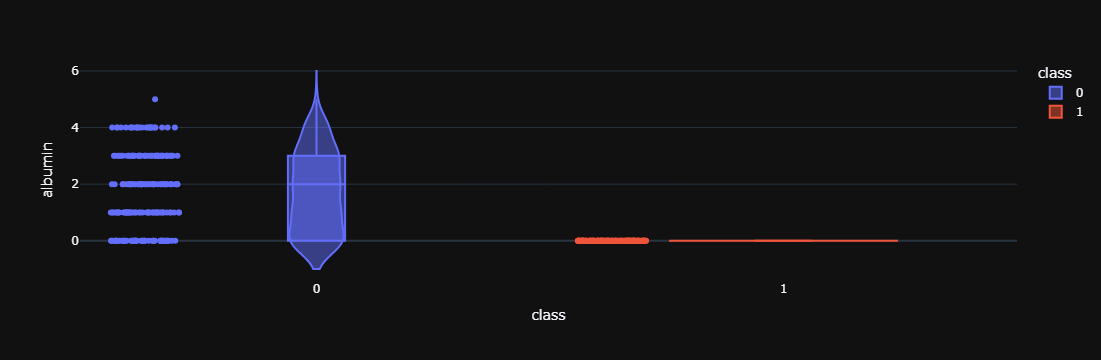

In [185]:
violin ('albumin')

Albumin levels are **concentrated around 0 to 4 in class 0**, while **class 1 shows a fixed lower level close to 0**.

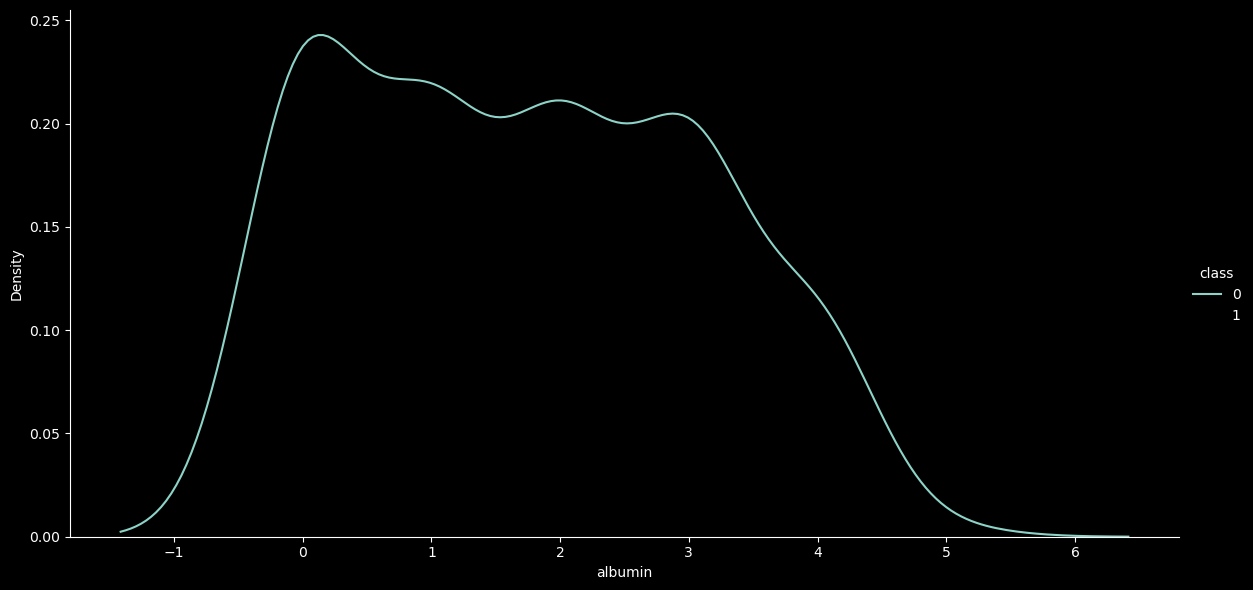

In [188]:
kde('albumin')

The albumin levels for **class 0 are mostly between 0 and 4, peaking around 1.5**.

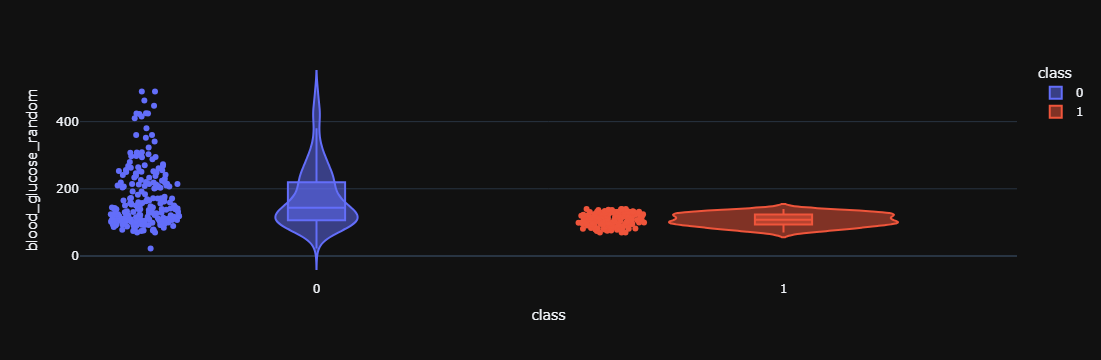

In [191]:
violin('blood_glucose_random')

Blood glucose levels are **more variable in class 0**, ranging from **0 to about 500**, while **class 1** shows **more concentrated values** between approximately **100 and 200**.

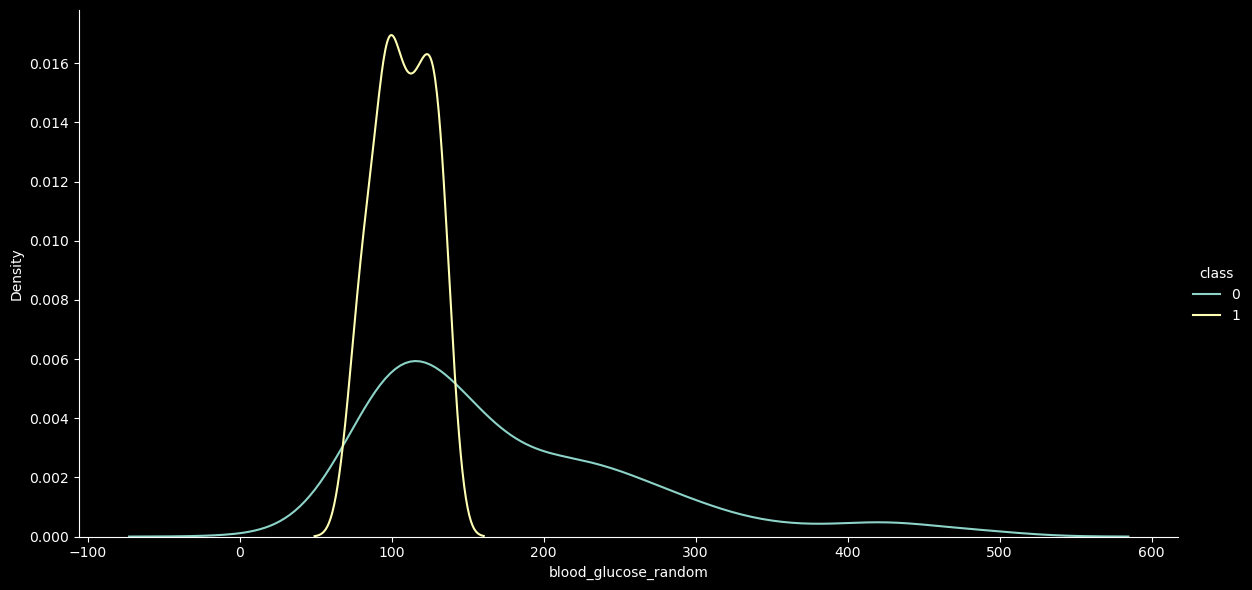

In [194]:
kde('blood_glucose_random')

Blood glucose levels for **class 1 are concentrated between 100 and 200**, while **class 0** shows a **broader distribution with a peak around 100**.

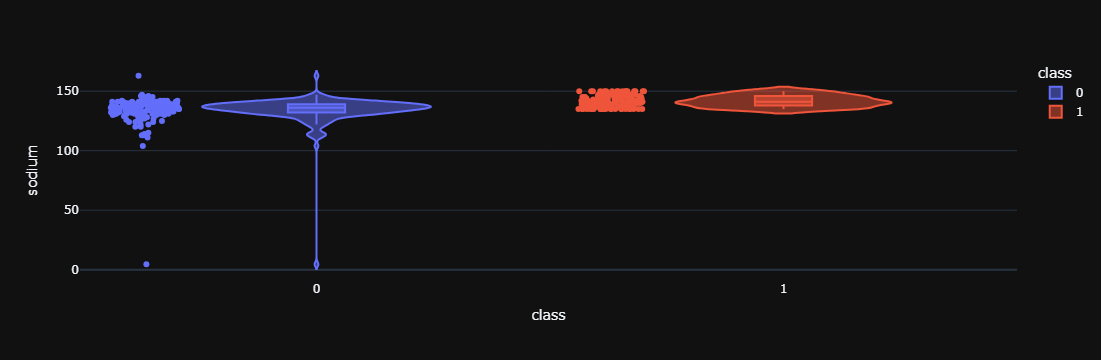

In [197]:
violin('sodium')

Sodium levels in **class 1 are concentrated around 140**, while **class 0** shows a **broader range** from **0 to 160** with a **concentration around 130-145**

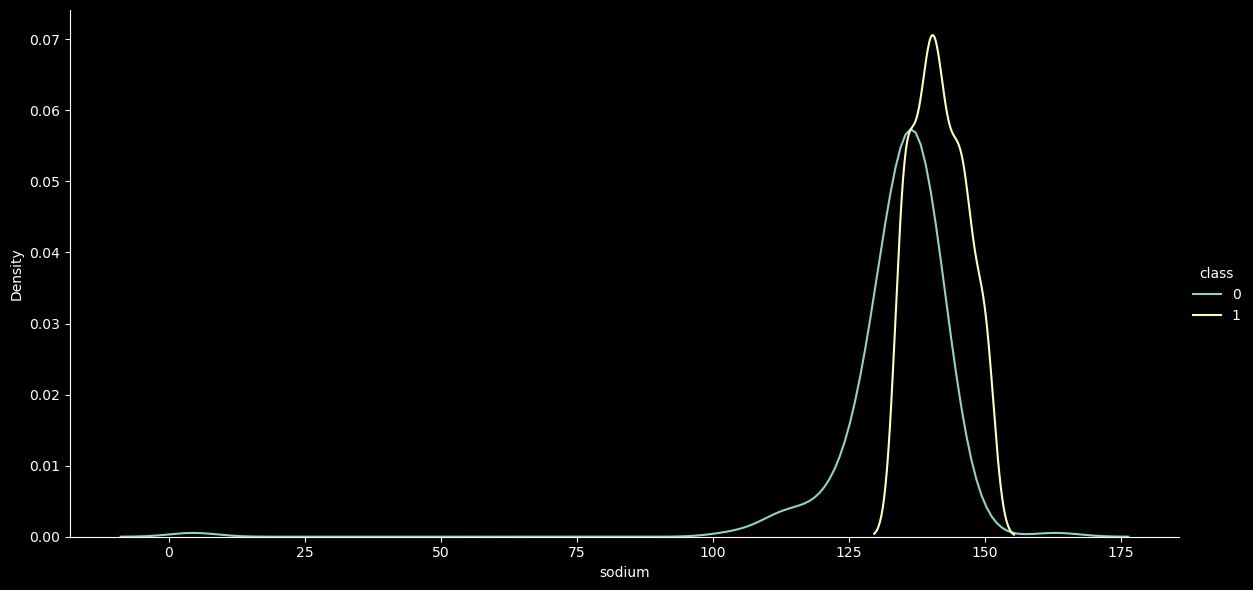

In [199]:
kde('sodium')

 Sodium levels for **both classes peak around 140-145**, with **class 1** showing a **slightly higher concentration** at the peak** compared to class 0.

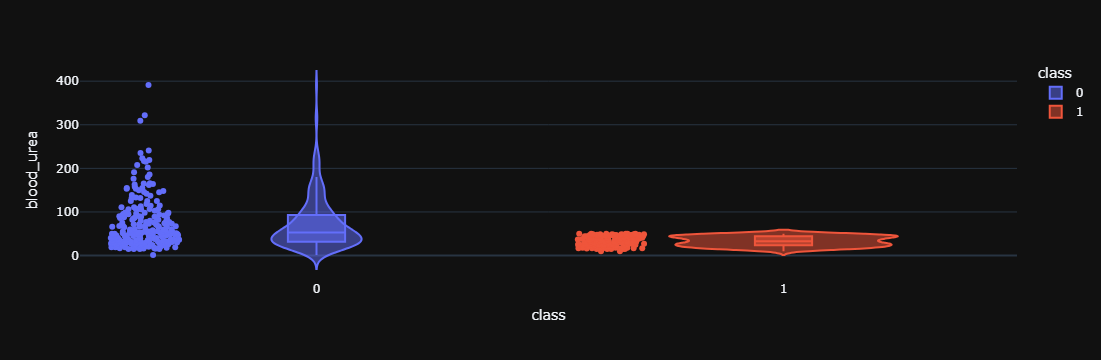

In [203]:
violin ('blood_urea')

The blood urea levels are significantly **higher in class 0** compared to class 1, with **class 0** having a **median around 50** and **class 1** having a **median around 25.**

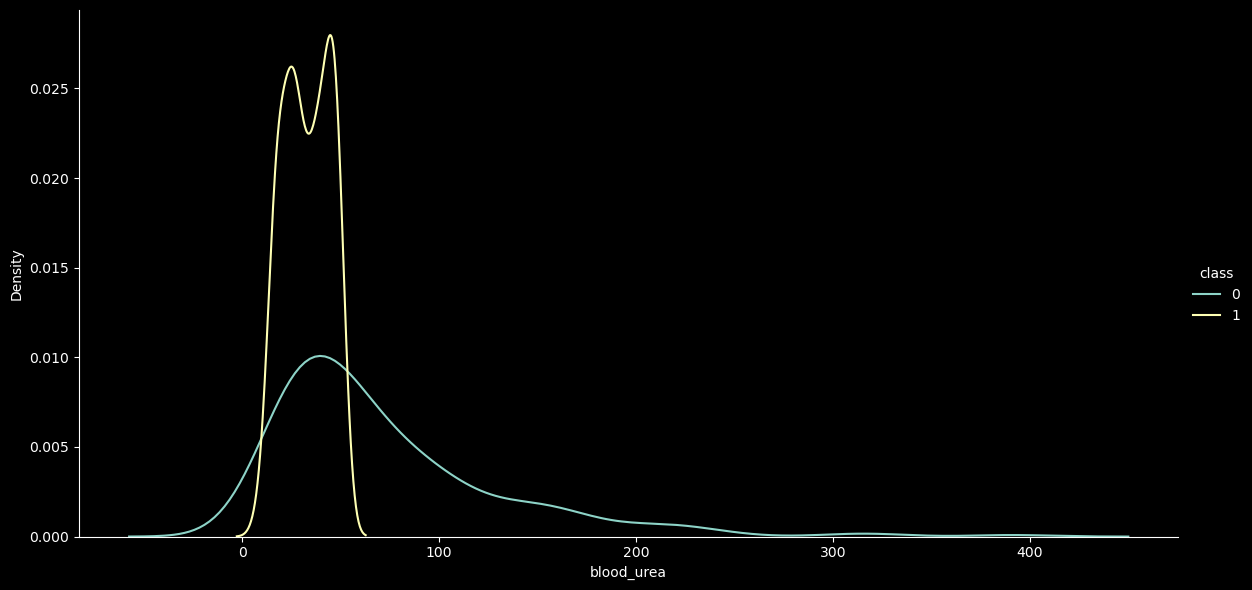

In [206]:
kde('blood_urea')

The blood urea distribution for **class 0 is more spread out** and has a long **tail extending up to 400**, while **class 1** has a **sharper peak around 25 and declines rapidly** after that.

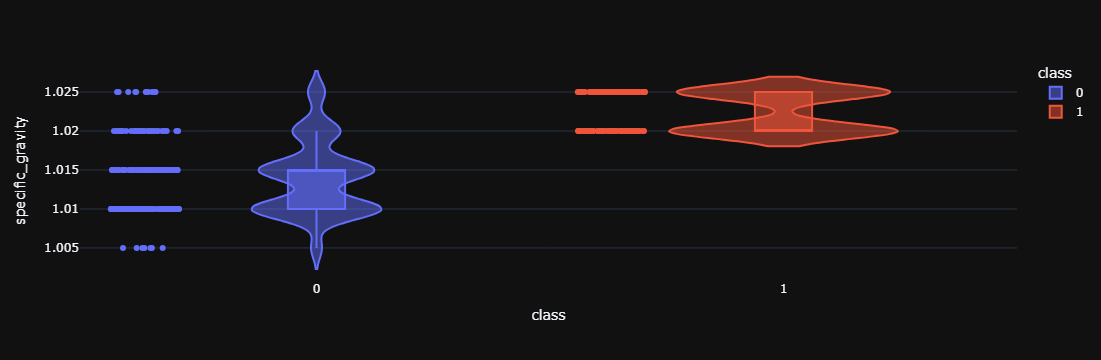

In [209]:
violin('specific_gravity')

The specific gravity for **class 0** shows a **broader distribution around the lower range (around 1.015)**, while **class 1** is **more concentrated around the higher range (around 1.025)**

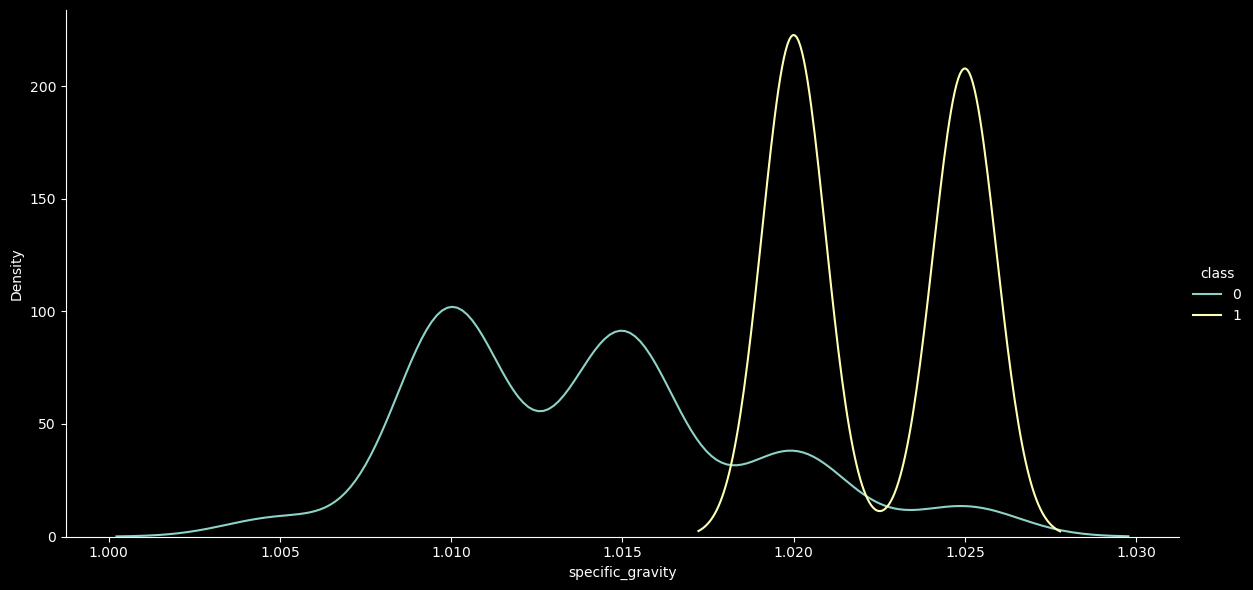

In [211]:
kde('specific_gravity')

**Class 0** shows a **bimodal distribution** with **peaks around 1.005 and 1.015**, whereas **class 1** has a **strong peak around 1.025**, indicating **higher specific gravity values**.

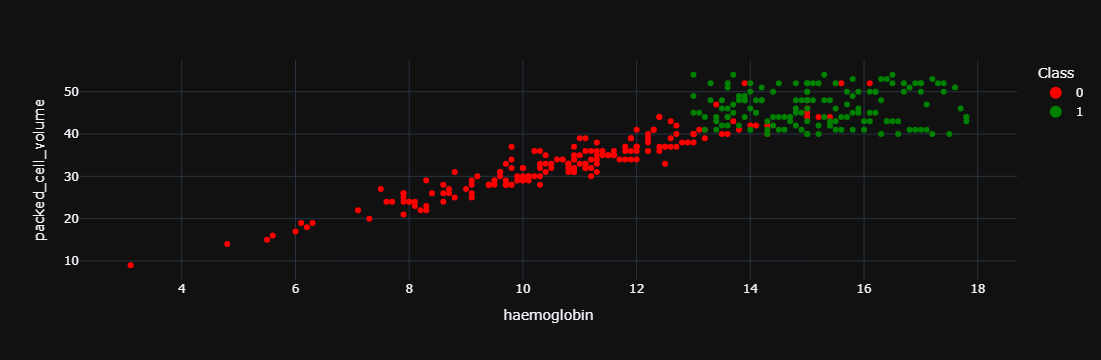

In [257]:
scatter('haemoglobin', 'packed_cell_volume')

**Higher packed cell volume** values (above 35) are predominantly **associated with class 1**, whereas **lower values** are **associated with class 0**, with a **positive correlation** observed between hemoglobin and packed cell volume.

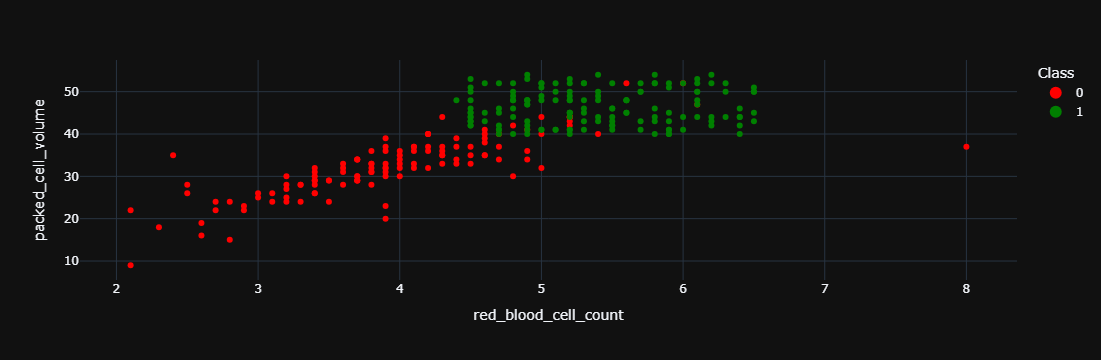

In [260]:
scatter('red_blood_cell_count' , 'packed_cell_volume')

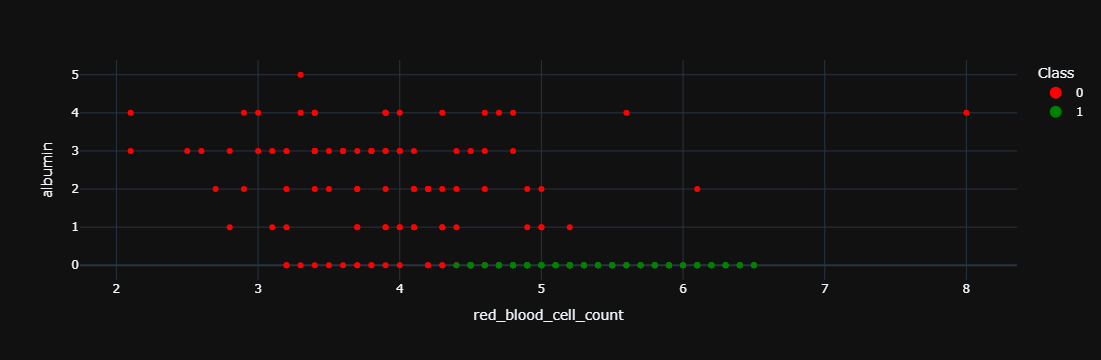

In [262]:
scatter('red_blood_cell_count', 'albumin')

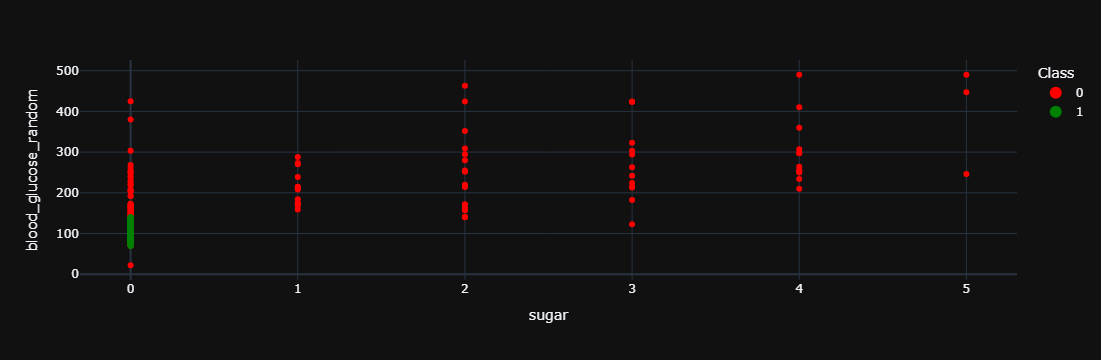

In [264]:
scatter('sugar', 'blood_glucose_random')

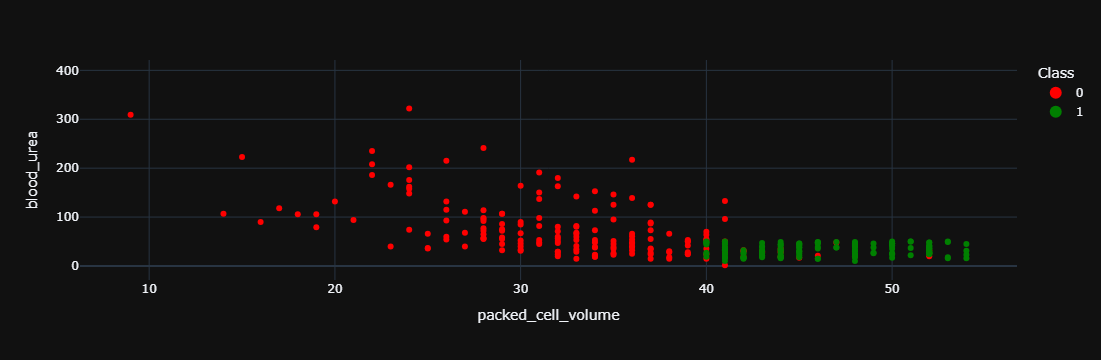

In [266]:
scatter('packed_cell_volume','blood_urea')

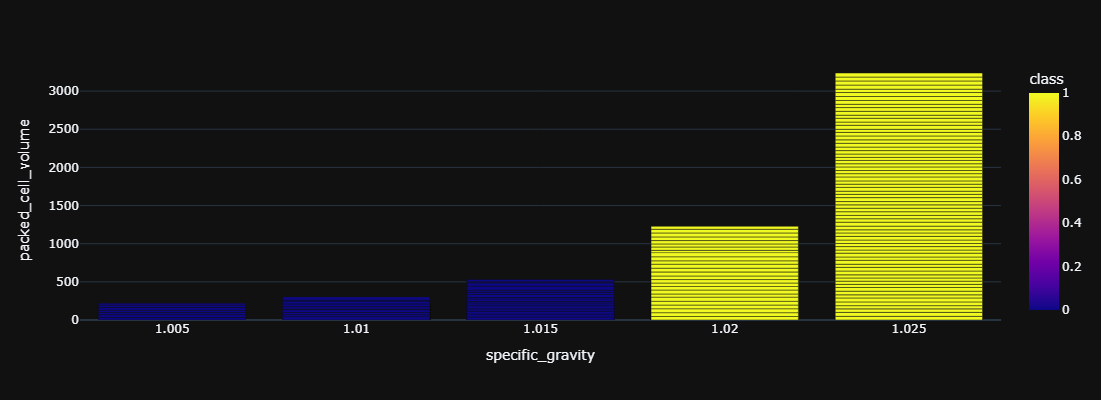

In [288]:
bar('specific_gravity', 'packed_cell_volume')

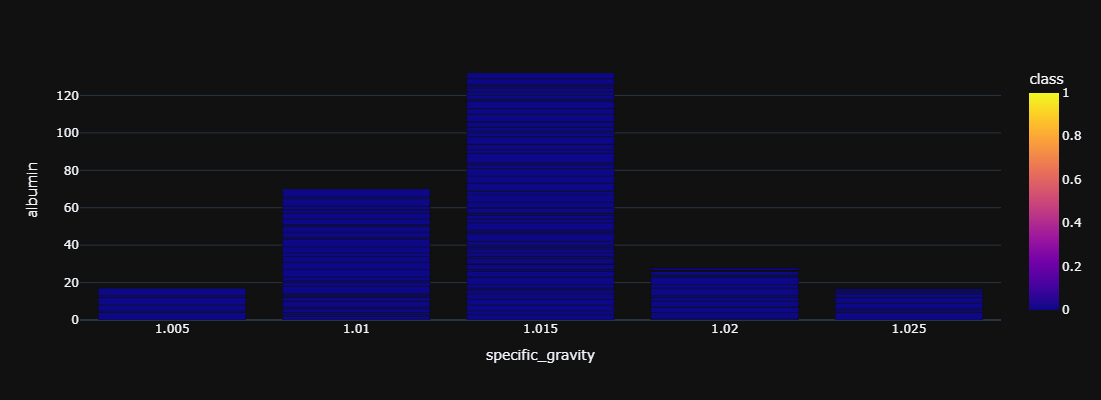

In [290]:
bar('specific_gravity', 'albumin')

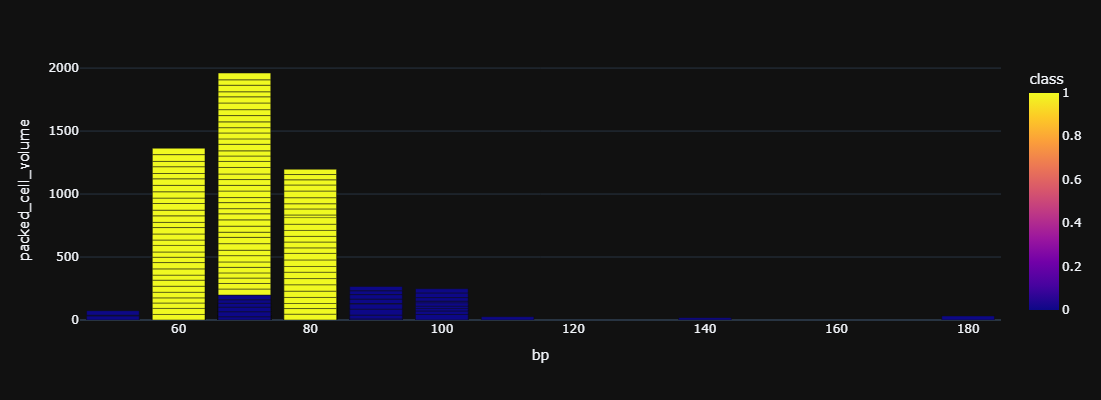

In [292]:
bar('bp', 'packed_cell_volume')

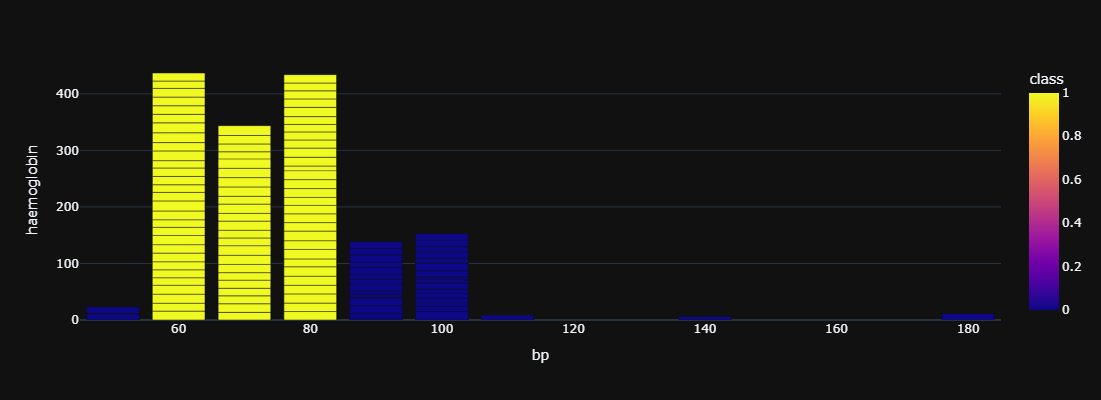

In [294]:
bar('bp', 'haemoglobin')

## Data Preprocessing

**Checking for null values**

In [298]:
df.isna().sum().sort_values(ascending = False)

rbc                        152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
bp                          12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
anemia                       1
class                        0
dtype: int64

In [318]:
numerical_cols = pd.Series(['age', 'bp', 'specific_gravity', 'albumin', 'sugar', 
                            'blood_glucose_random', 'blood_urea', 'serum_creatinine', 
                            'sodium', 'potassium', 'haemoglobin', 'packed_cell_volume', 
                            'white_blood_cell_count', 'red_blood_cell_count', 'class'])

num_cols = [item for item in numerical_cols.tolist() if item != 'class']

In [320]:
df[num_cols].isnull().sum()

age                         9
bp                         12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
dtype: int64

In [322]:
df[categorical_cols].isnull().sum()

rbc                        152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
anemia                       1
class                        0
dtype: int64

Now we will **fill null values**
Random Sampling for higher null values 
Mean / Mode Sampling for lower null values

In [326]:
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    random_sample.index = df[df[feature].isnull()].index
    df.loc[df[feature].isnull(), feature] = random_sample
    
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)

Filling null values in numerical columns with random samples

In [328]:
for col in num_cols:
    random_value_imputation(col)

In [330]:
df[num_cols].isnull().sum()

age                       0
bp                        0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
dtype: int64

Filling rbc and pus_cell with random samples and others with median/mode

In [338]:
random_value_imputation('rbc')
random_value_imputation('pus_cell')

for col in categorical_cols:
    impute_mode(col)

In [340]:
df[categorical_cols].isnull().sum()

rbc                        0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
anemia                     0
class                      0
dtype: int64

## Feature Encoding

In [343]:
for col in categorical_cols:
    print(f"{col} has {df[col].nunique()} categories\n")

rbc has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

anemia has 2 categories

class has 2 categories



We can use **label encoding method** as every column has 2 categories

In [346]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [348]:
df.head()

,age,bp,specific_gravity,albumin,sugar,rbc,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,serum_creatinine,sodium,potassium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,36.0,1.2,136.0,4.3,15.4,44.0,7800.0,5.2,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,107.0,18.0,0.8,139.0,4.6,11.3,38.0,6000.0,2.7,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,53.0,1.8,139.0,4.5,9.6,31.0,7500.0,5.6,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,26.0,1.4,150.0,5.0,11.6,35.0,7300.0,4.6,0,0,0,0,0,0,0


## Model Building

In [365]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
y = df[dep_col]

In [371]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1']) 
    plt.show() 

**Splitting Data** into **training and testing** sets

In [374]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

### KNN

In [377]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [378]:
knn_acc = accuracy_score(y_test, knn.predict(X_test))

Accuracy Score, Confusion Matrix and Classification Report

Training Accuracy of KNN is 0.8214285714285714
Test Accuracy of KNN is 0.6666666666666666 

Confusion Matrix :- 



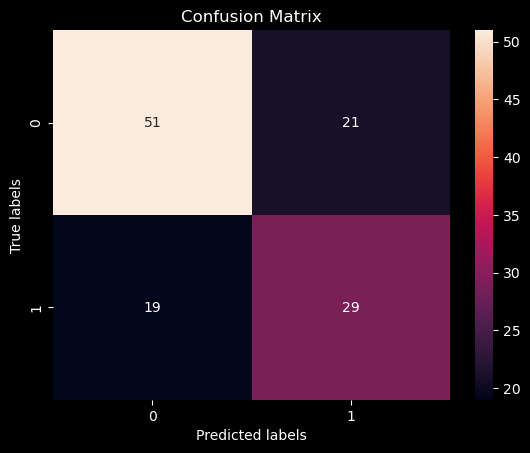

Classification Report :- 
               precision    recall  f1-score   support

           0       0.73      0.71      0.72        72
           1       0.58      0.60      0.59        48

    accuracy                           0.67       120
   macro avg       0.65      0.66      0.66       120
weighted avg       0.67      0.67      0.67       120



In [382]:
print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n")
plot_confusion_matrix(y_test , knn.predict(X_test))
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")

### Decision Tree Classifier

In [385]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [387]:
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.95 

Confusion Matrix :- 



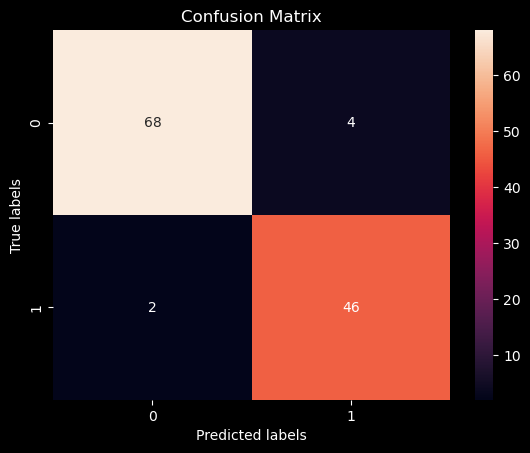

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.94      0.96        72
           1       0.92      0.96      0.94        48

    accuracy                           0.95       120
   macro avg       0.95      0.95      0.95       120
weighted avg       0.95      0.95      0.95       120



In [389]:
print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n")
plot_confusion_matrix(y_test , dtc.predict(X_test))
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

**Hyperparameter Tuning**

In [392]:
from sklearn.model_selection import GridSearchCV
grid_param = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'splitter' : ['best', 'random'],
    'min_samples_leaf' : [1, 2, 3, 5, 7],
    'min_samples_split' : [1, 2, 3, 5, 7],
    'max_features' : ['auto', 'sqrt', 'log2']
}

grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 5, n_jobs = -1, verbose = 1)
grid_search_dtc.fit(X_train, y_train)

Fitting 5 folds for each of 1200 candidates, totalling 6000 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 5, 7],
                         'min_samples_split': [1, 2, 3, 5, 7],
                         'splitter': ['best', 'random']},
             verbose=1)

**Best Parameters and Best Score**

In [395]:
print(grid_search_dtc.best_params_)
print(grid_search_dtc.best_score_)

{'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}
0.9892857142857142


In [397]:
dtc = grid_search_dtc.best_estimator_

Training Accuracy of Decision Tree Classifier is 0.9964285714285714
Test Accuracy of Decision Tree Classifier is 0.9666666666666667 

Confusion Matrix :- 



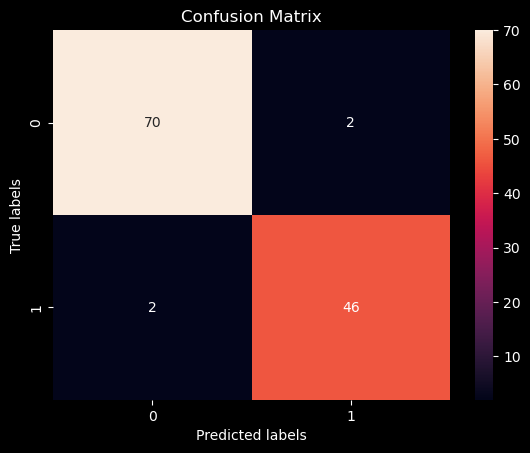

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        72
           1       0.96      0.96      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.97      0.97       120
weighted avg       0.97      0.97      0.97       120



In [399]:
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")
print(f"Confusion Matrix :- \n")
plot_confusion_matrix(y_test , dtc.predict(X_test))
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

### Random Forest Classifier

In [406]:
from sklearn.ensemble import RandomForestClassifier

rd_clf = RandomForestClassifier(criterion='entropy', max_depth=11, max_features=5, min_samples_leaf=2, min_samples_split=3, n_estimators=130)
rd_clf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, max_features=5,
                       min_samples_leaf=2, min_samples_split=3,
                       n_estimators=130)

In [408]:
rd_clf_acc = accuracy_score(y_test, rd_clf.predict(X_test))


Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 0.9833333333333333 

Confusion Matrix :-



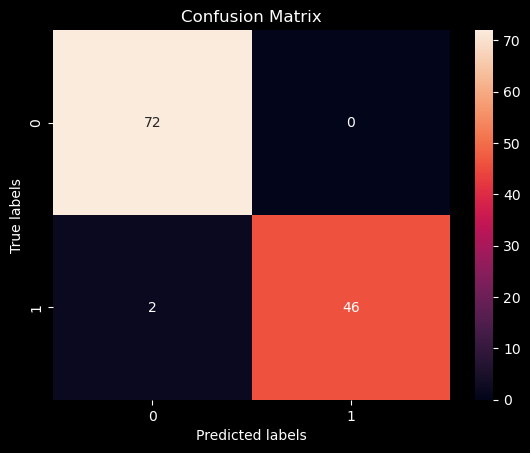

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [410]:
print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rd_clf.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rd_clf_acc} \n")

print(f"Confusion Matrix :-\n")
plot_confusion_matrix(y_test , rd_clf.predict(X_test))
print(f"Classification Report :- \n {classification_report(y_test, rd_clf.predict(X_test))}")

### ADA Boost Classifier

In [415]:
from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
ada.fit(X_train, y_train)

AdaBoostClassifier()

In [417]:
ada_acc = accuracy_score(y_test, ada.predict(X_test))

Training Accuracy of Ada Boost Classifier is 1.0
Test Accuracy of Ada Boost Classifier is 0.9916666666666667 

Confusion Matrix :- 



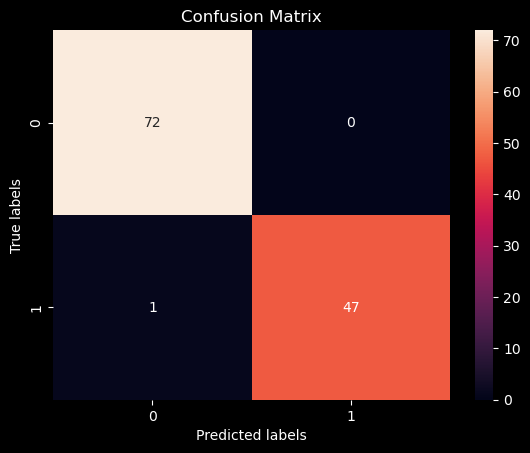

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99        72
           1       1.00      0.98      0.99        48

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [419]:
print(f"Training Accuracy of Ada Boost Classifier is {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Test Accuracy of Ada Boost Classifier is {ada_acc} \n")
print(f"Confusion Matrix :- \n")
plot_confusion_matrix(y_test , ada.predict(X_test))
print(f"Classification Report :- \n {classification_report(y_test, ada.predict(X_test))}")

### Gradient Boosting Classifier

In [422]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier()

In [424]:
gb_acc = accuracy_score(y_test, gb.predict(X_test))

Training Accuracy of Gradient Boosting Classifier is 1.0
Test Accuracy of Gradient Boosting Classifier is 0.9833333333333333 

Confusion Matrix :- 



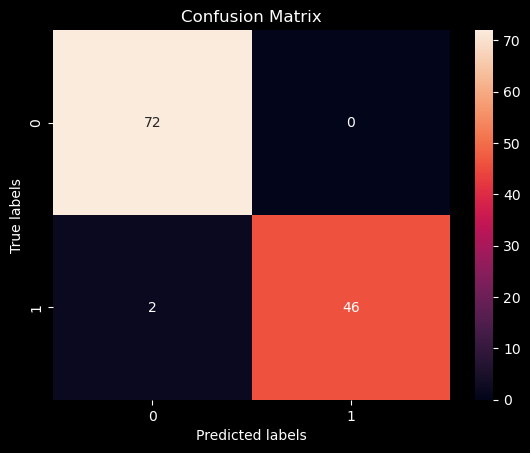

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [426]:
print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")
print(f"Confusion Matrix :- \n")
plot_confusion_matrix(y_test , gb.predict(X_test))
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

### Stochastic Gradient Boosting

In [429]:
sgb = GradientBoostingClassifier(max_depth = 4, subsample = 0.90, max_features = 0.75, n_estimators = 200)
sgb.fit(X_train, y_train)


GradientBoostingClassifier(max_depth=4, max_features=0.75, n_estimators=200,
                           subsample=0.9)

In [431]:
sgb_acc = accuracy_score(y_test, sgb.predict(X_test))


Training Accuracy of Stochastic Gradient Boosting is 1.0
Test Accuracy of Stochastic Gradient Boosting is 0.9833333333333333 

Confusion Matrix :-



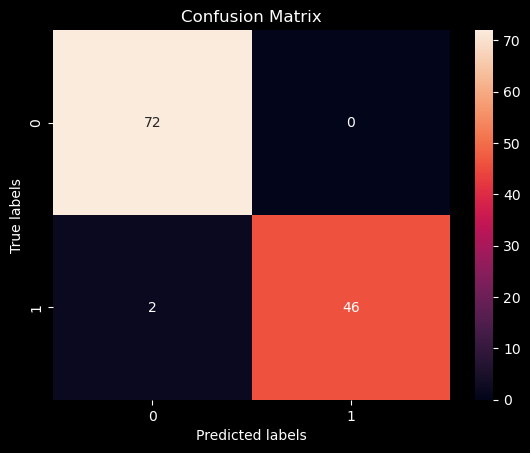

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [433]:
print(f"Training Accuracy of Stochastic Gradient Boosting is {accuracy_score(y_train, sgb.predict(X_train))}")
print(f"Test Accuracy of Stochastic Gradient Boosting is {sgb_acc} \n")
print(f"Confusion Matrix :-\n")
plot_confusion_matrix(y_test , sgb.predict(X_test))
print(f"Classification Report :- \n {classification_report(y_test, sgb.predict(X_test))}")

### Extra Trees Classifier

In [446]:
from sklearn.ensemble import ExtraTreesClassifier

etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)


ExtraTreesClassifier()

In [448]:
etc_acc = accuracy_score(y_test, etc.predict(X_test))

Training Accuracy of Extra Trees Classifier is 1.0
Test Accuracy of Extra Trees Classifier is 0.9666666666666667 

Confusion Matrix :- 



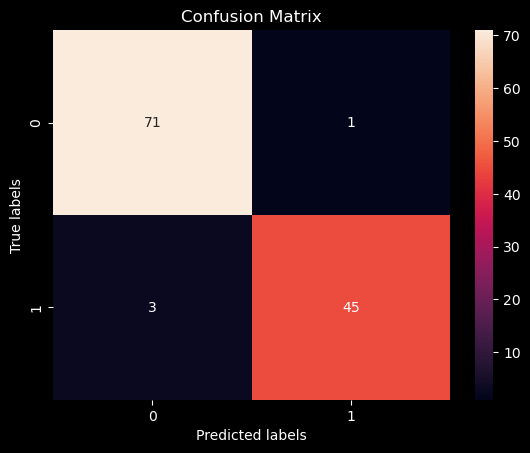

Classification Report :- 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.98      0.94      0.96        48

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.97       120
weighted avg       0.97      0.97      0.97       120



In [450]:
print(f"Training Accuracy of Extra Trees Classifier is {accuracy_score(y_train, etc.predict(X_train))}")
print(f"Test Accuracy of Extra Trees Classifier is {etc_acc} \n")
print(f"Confusion Matrix :- \n")
plot_confusion_matrix(y_test , etc.predict(X_test))
print(f"Classification Report :- \n {classification_report(y_test, etc.predict(X_test))}")

### Xg Boost

In [461]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 5, n_estimators = 150)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [464]:
xgb_acc = accuracy_score(y_test, xgb.predict(X_test))


Training Accuracy of XgBoost is 1.0
Test Accuracy of XgBoost is 0.9833333333333333 

Confusion Matrix :- 



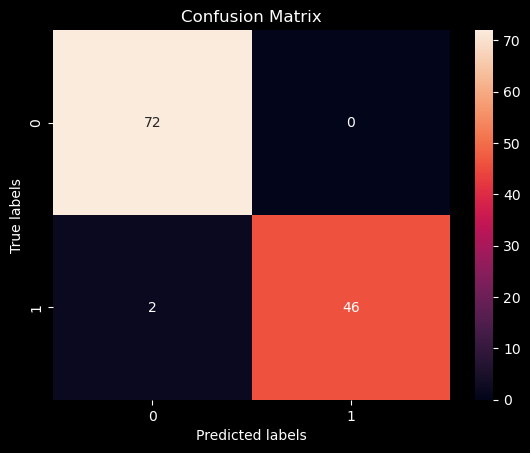

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.96      0.98        48

    accuracy                           0.98       120
   macro avg       0.99      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [466]:
print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")
print(f"Confusion Matrix :- \n")
plot_confusion_matrix(y_test , xgb.predict(X_test))
print(f"Classification Report :- \n {classification_report(y_test, xgb.predict(X_test))}")

### Cat Boost Classifier

In [469]:
from catboost import CatBoostClassifier

cat = CatBoostClassifier(iterations=10)
cat.fit(X_train, y_train)

Learning rate set to 0.408198
0:	learn: 0.2533924	total: 79.9ms	remaining: 719ms
1:	learn: 0.1470297	total: 84.4ms	remaining: 338ms
2:	learn: 0.0835063	total: 90.6ms	remaining: 211ms
3:	learn: 0.0555708	total: 95.2ms	remaining: 143ms
4:	learn: 0.0393256	total: 101ms	remaining: 101ms
5:	learn: 0.0323254	total: 108ms	remaining: 72.1ms
6:	learn: 0.0244200	total: 116ms	remaining: 49.7ms
7:	learn: 0.0194990	total: 120ms	remaining: 30ms
8:	learn: 0.0167275	total: 125ms	remaining: 13.9ms
9:	learn: 0.0137563	total: 137ms	remaining: 0us


In [471]:
cat_acc = accuracy_score(y_test, cat.predict(X_test))

Training Accuracy of Cat Boost Classifier is 1.0
Test Accuracy of Cat Boost Classifier is 0.9833333333333333 

Confusion Matrix :- 



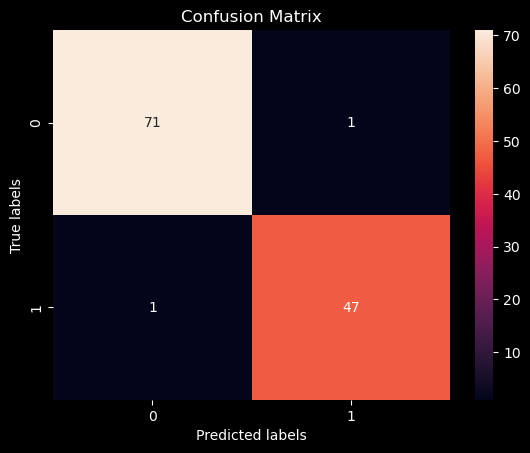

Classification Report :- 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        48

    accuracy                           0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



In [473]:
print(f"Training Accuracy of Cat Boost Classifier is {accuracy_score(y_train, cat.predict(X_train))}")
print(f"Test Accuracy of Cat Boost Classifier is {cat_acc} \n")
print(f"Confusion Matrix :- \n")
plot_confusion_matrix(y_test , cat.predict(X_test))
print(f"Classification Report :- \n {classification_report(y_test, cat.predict(X_test))}")

## Models Comparison

In [476]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'Stochastic Gradient Boosting', 'XgBoost', 'Cat Boost', 'Extra Trees Classifier'],
    'Score' : [knn_acc, dtc_acc, rd_clf_acc, ada_acc, gb_acc, sgb_acc, xgb_acc, cat_acc, etc_acc]
})

In [478]:
models.sort_values(by = 'Score', ascending = False)

,Model,Score
3,Ada Boost Classifier,0.991667
2,Random Forest Classifier,0.983333
4,Gradient Boosting Classifier,0.983333
5,Stochastic Gradient Boosting,0.983333
6,XgBoost,0.983333
7,Cat Boost,0.983333
1,Decision Tree Classifier,0.966667
8,Extra Trees Classifier,0.966667
0,KNN,0.666667


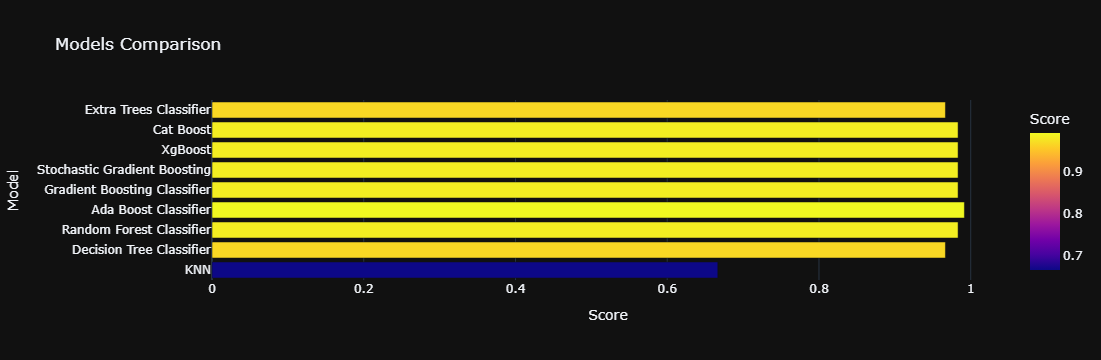

In [480]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', 
       title = 'Models Comparison')